In [1]:
from pyerr import ErrorrOutput
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# path to tape28 file for U235 ENDF-7.1
fle = "../pfns/tape28"

create `ErrorrOutput` object without energy limits

In [3]:
output = ErrorrOutput(fle)

for PFNS, need to look at MT (section) 18, which is fission

In [4]:
pfns = output.sections[18]

`pfns` is a Section object

In [69]:
pfns

the doc string lists the attributes and methods

In [70]:
help(pfns)

Help on Section in module pyerr._section object:

class Section(builtins.object)
 |  Section(energy_lines, mean_lines, covariance_lines, lower_limit=None, upper_limit=None)
 |  
 |  Class to hold a single section (MT value) from an ERRORR file, which includes
 |  the energy grid, the mean value, and the covariance matrix
 |  
 |  Parameters
 |  ----------
 |  energy_lines : list
 |      list of the lines from the file corresponding to the energy grid
 |  
 |  mean_lines : list
 |      list of the lines from the file corresponding to the mean values
 |  
 |  covariance_lines : list
 |      list of the lines from the file corresponding to the covariance
 |  
 |  lower_limit : float, optional, default is None
 |      the lower limit in energy (eV) to cut the values at. If not given, uses the lower 
 |      limit of the matrix in the file. If given, will cut out groups below the lower 
 |      limit. If the lower limit falls within a group, that group is kept
 |  
 |  
 |  upper_limit : fl

the eigenvalues and eigenvectors of the relative covariance matrix are calculated and sorted upon initialization of the object

In [5]:
# eigenvalues
pfns.eig_vals

array([ 2.37463130e-05,  7.49995398e-06,  4.36143693e-10,  1.05226529e-11,
        9.06470580e-12,  7.71943849e-12,  6.54072614e-12,  6.13336238e-12,
        5.66372732e-12,  4.35676210e-12,  4.02340674e-12,  3.49360933e-12,
        2.76926802e-12,  2.45607725e-12,  2.31005702e-12,  1.95547541e-12,
        1.64170449e-12,  1.45364987e-12,  1.41363440e-12,  1.19344586e-12,
        1.12006359e-12,  1.08211992e-12,  1.03740866e-12,  1.00269565e-12,
        9.22852136e-13,  8.87890088e-13,  8.16036421e-13,  7.37632582e-13,
        6.78482830e-13,  6.60283307e-13,  5.39065309e-13,  4.99779218e-13,
        4.36898879e-13,  4.05050474e-13,  3.61656987e-13,  3.26381438e-13,
        2.61174063e-13,  2.40406232e-13,  1.83661890e-13,  1.61809953e-13,
        1.29511985e-13,  1.16087384e-13,  9.79272793e-14,  7.12340035e-14,
        5.75497865e-14,  3.99207977e-14,  3.51385047e-14,  2.76111549e-14,
        2.60566112e-14,  2.18876189e-14,  2.08076886e-14,  1.79435918e-14,
        1.32904215e-14,  

In [6]:
# eigenvectors
pfns.eig_vects

array([[-6.04950742e-08,  5.10744127e-08, -1.78394463e-07, ...,
        -3.17257987e-08, -4.68762337e-08,  6.66556476e-08],
       [-6.62720249e-08,  5.59545510e-08, -1.95811877e-07, ...,
        -6.44760773e-08, -3.22079867e-08, -1.15284096e-07],
       [-7.15850086e-08,  6.04432014e-08, -2.11045175e-07, ...,
         7.80202746e-08, -5.03323197e-08,  4.59390967e-08],
       ...,
       [ 3.55953778e-03,  1.70672829e-02, -1.35682846e-02, ...,
         6.59599723e-03,  1.11817268e-02, -6.56070527e-03],
       [ 9.09068098e-04,  4.62241893e-03, -1.58615095e-02, ...,
         9.75298430e-05, -2.17088032e-04, -1.02448917e-03],
       [ 2.36349953e-04,  1.18578821e-03, -8.40615269e-03, ...,
        -6.00451141e-06, -6.03083558e-04, -5.52608217e-04]])

The eigenvectors can be plotted relative to the largest one

Text(0, 0.5, 'Eigenvalue (relative to max)')

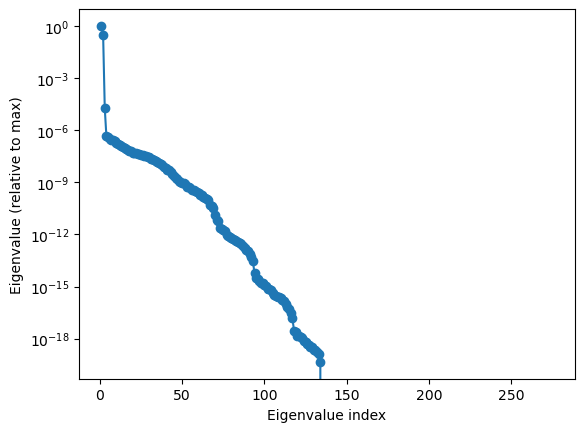

In [13]:
indices = list(range(1,len(pfns.eig_vals)+1))
plt.semilogy(indices, pfns.eig_vals/pfns.eig_vals[0])
plt.scatter(indices,pfns.eig_vals/pfns.eig_vals[0])
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue (relative to max)")

In this case, the ENDF-7.1 PFNS for U235, the eigenvalues fall off very quickly because there are very strong correlations between outgoing energies

## Reconstruct Covariance 

The covariance matrix can be reconstructed with any number of components using the `reconstruct_covariance` method. This can be used to make plots showing the contribution of the components to the uncertainty

In [14]:
help(pfns.reconstruct_covariance)

Help on method reconstruct_covariance in module pyerr._section:

reconstruct_covariance(k=None) method of pyerr._section.Section instance
    Function to reconstruct the covariance matrix from the 
    largest k eigenvalues
    
    Parameters
    ----------
    k : int, optional, default is None
        the number of eigenvalues to use. If None, will use
        all of the eigenvalues of the covariane matrix
    
    Returns
    -------
    numpy array 
        The covariance matrix reconstructed from the top k
        eigenvalues



Text(0.5, 0, 'Relative Uncertainty')

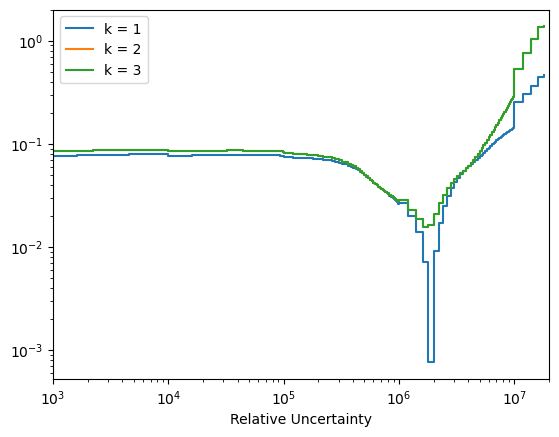

In [27]:
# k is number of components
for k in range(1,4):
    
    # reconstruct cov matrix
    cov = pfns.reconstruct_covariance(k)

    # get uncertainty from cov
    unc = np.sqrt(np.diag(cov))

    #plot
    plt.step(pfns.group_boundaries[:-1],unc/pfns.mean_values,label=f"k = {k}", where='post')

plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e3,2e7)
plt.xlabel("Outgoing neutron energy [eV]")
plt.xlabel("Relative Uncertainty")

## PCA realizations

the method `get_pca_realizations` can produce realizations of the PFNS based on the covariance reconstruct with any number of components

In [28]:
pfns_samples = pfns.get_pca_realizations(k=1,num_samples=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ENDF7.1 Samples with k=1 components')

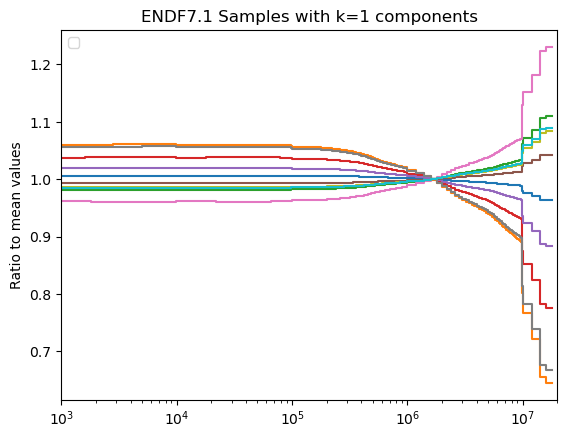

In [29]:
for sample in pfns_samples:
    plt.step(pfns.group_boundaries[:-1],sample/pfns.mean_values)

plt.ylabel("Ratio to mean values")
plt.xscale("log")
plt.xlim(1e3,2e7)
plt.legend()
plt.title("ENDF7.1 Samples with k=1 components")